# Microwave and Radar Remote Sensing - WS1 (b)

## Antennas

In this workshop, we will complete the introduction to the basic characteristics of antennas and array of antennas.

To start our simulations, we first need to check if we correctly set the environment and test if all necessary packages have been installed. The following line of code will:
1) make a check about the python environment one is currently using

2) import the needed python packages (in case of errors, the package has probably not correctly been installed in the environment)

In [1]:
import sys
print(sys.executable)

/Users/alanromer/opt/anaconda3/bin/python


In [2]:
import scipy.constants as constants
import matplotlib.pyplot as plt
import numpy as np

### From the theory

As previously mentioned **directivity** is the ability of an antenna to confine the radiated energy into a limited portion of space. 

This term is often misused to indicate the maximum of the directivity instead of its variation with $\theta$. The maximum of the directivity, indicated with $D$ in the following can be approximated as

$$D_\mathrm{max}=D\approx \frac{4\pi}{\theta_\mathrm{az}\cdot \theta_\mathrm{el}}=\frac{4\pi\cdot L_\mathrm{az}\cdot L_\mathrm{el}}{\lambda^2}\quad ,$$

where the terms in the numerator $L_\mathrm{az}$ and $L_\mathrm{el}$ desribe the size in azimuth and elevation of the antenna, respectively. 

The **gain** of the antenna is defined as the directivity multiplied by an **efficiency factor**, i.e., 

$$G=\eta\cdot D\approx \quad \frac{4\pi\cdot A_\mathrm{ant}}{\lambda^2}\cdot \eta,$$

where $A_\mathrm{ant}$ is the surface of the antenna, and $\eta$ measures the ratio between the radiated power in the considered direction and the power available at the input of the antenna, and vice versa. The efficiency of the antenna mainly depends on technology and frequency of operation, and typical values which can be used are between 0.6 and 0.9. 

The gain emulates the behaviour of the antenna as a **signal amplifier** (only in the pointing direction!!!) and will be used accordingly in the computation of the power budget of the imaging link. 

Note that the previous derivation can be used to approximate the characteristics of simple antennas such as apertures (e.g., open waveguides and horns) and can also be used -with some caution- to predict the characteristics of reflector antennas. 

### Exercise 1

The size of the TerraSAR-X antenna is 0.7 m in elevation and 4.7 m in azimuth. Assuming an efficiency of 0.9 compute the gain in dBi.

### Answer 1

In [3]:
f0    = 9.65e9
wl    = constants.c / f0

def Lin2dB(input):
    return 10 * np.log10(input)

def cal_Gain_dbi(ele,azi,eff):
    A_ant =ele*azi
    Directivity = 4*np.pi * A_ant/ wl**2
    Gain = Directivity * eff
    Gain_db = Lin2dB(Gain)
    return Gain_db

Gain=cal_Gain_dbi(0.7,4.7,0.9)
print(f'Gain in decibel is given as:{Gain:.2f} db')



    

Gain in decibel is given as:45.86 db


### Exercise 2

If a change in the radiation pattern is desired, other than changing the physical characteristics of the antenna, this can be done by weighting the distribution of the current flowing trough the antenna. Nevertheless, complex waveforms could show several practical limitations by complicating hardware and reducing the sensitivity of the system. 

In order to overcome these limitations, several antennas may be used together forming **arrays**, which allows for **dynamic beam-forming and electronic steering**. 

The figure below shows the basic geometrical model for a one-dimensional array. 

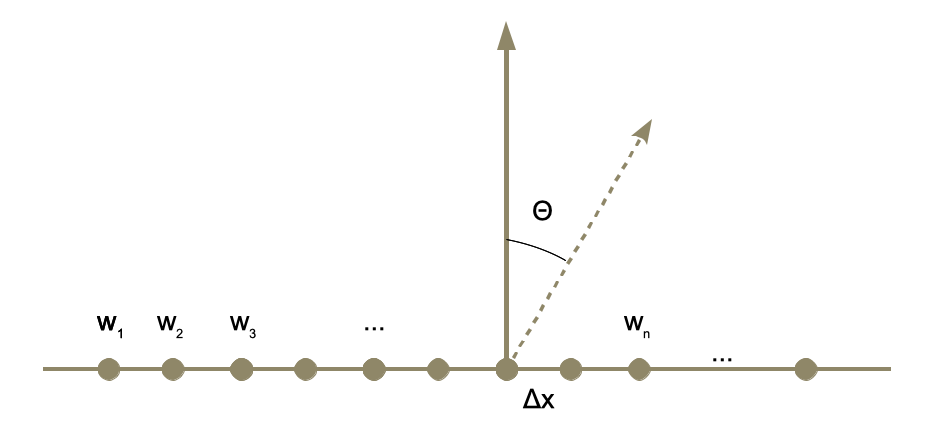


Assuming all elements of the array are identical, the **radiation pattern** of the array can be shown to be 

$$p_\mathrm{array}(\theta)=p_\mathrm{element}(\theta)\cdot \left|\sum_n w_n\cdot \exp\left[-\mathrm{j}\cdot \frac{2\pi}{\lambda}\cdot n\cdot\Delta x\cdot \sin\theta\right]\right|^2$$

The $w_n$ are weights and represent complex values which can be used for **shaping the pattern of the array**. 

Note that the previous expression takes the form of a **discrete Fourier transform of the weighting coefficients**. 

The TerraSAR-X antenna is a phased-array type with 12 elements in azimuth. The bottom program computes the element and array patterns by assuming unitary weightings. 

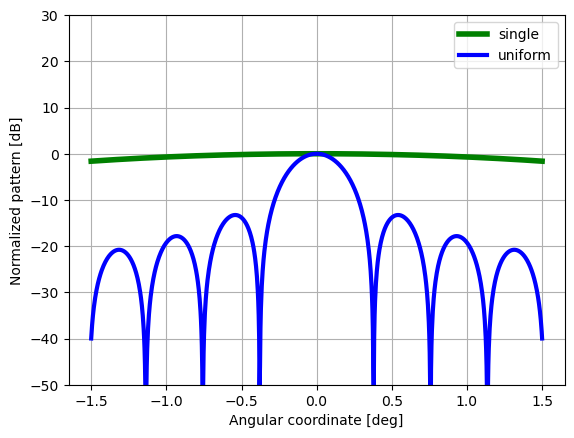

In [19]:
f0 = 9.65e9
wl = constants.c / f0
N = 1024
th = -np.pi/120. + np.arange(N) / (N-1) * np.pi/60.
L = 4.7 # Total antenna length
Nel = 12  # Number of elements
dx = L/Nel * (-0.5 * Nel + 0.5 + np.arange(Nel))  # distance between the array elements

def Lin2dB(input):
    return 10 * np.log10(input)

## Generate the antenna pattern for a single element

def getPattern(wl, L, th):
    x = L*np.sin(th)/wl 
    pattern = np.sinc(x)**2
    return pattern

patEl = getPattern(wl, L/Nel, th) # for a single element

## Define a function (getArrayPattern) to generate the array antenna pattern

def getArrayPattern(th, patEl, w, wl, dx):
    N = len(th)
    AF = 0
    for i in range(Nel):
        AF += w[i] * np.exp(-2j * np.pi / wl * dx[i] * np.sin(th))
    return patEl * abs(AF)**2

##
## Try out different weights distributions and comment on the results

# opt1: uniformly distributed weights
weights = np.ones(Nel) / Nel

# opt2: rect distribution
#weights2 = np.ones(Nel)
#weights2[(np.arange(Nel)-Nel/2) > Nel/8] = 0
#weights2 = weights2 / np.sum(weights2)

# opt3: complex weights distribution
#weights3 = np.exp(2j * np.pi / wl * dx * np.sin(0.3 * np.pi / 180.)) / Nel

## Plot the results
pat1 = getArrayPattern(th, patEl, weights, wl, dx)
#pat2 = getArrayPattern(th, patEl, weights2, wl, dx)
#pat3 = getArrayPattern(th, patEl, weights3, wl, dx)

plt.figure()
plt.plot(th * 180. / np.pi, Lin2dB(patEl), 'g', lw=4)
plt.plot(th * 180. / np.pi, Lin2dB(pat1), 'b', lw=3)
#plt.plot(th * 180. / np.pi, Lin2dB(pat2), 'm', lw=2)
#plt.plot(th * 180. / np.pi, Lin2dB(pat3), 'y', lw=2)
plt.ylim(-50, 30)
plt.xlabel('Angular coordinate [deg]')
plt.ylabel('Normalized pattern [dB]')
plt.legend(['single', 'uniform', 'rect', 'complex'])
plt.grid()
plt.show()

Discuss the effect of the use of an array in place of a single element antenna as observed in the exercise.

1) Which property of the radiation pattern can you observe?

2) How the different design parameters are influencing the radiation pattern?

3) Which is the effect of using an uniform weights distribution?

4) Which is the effect of using a complex weights distribution?

5) What kind of weighting would you use if you aimed at broadening the aperture of the array? 

6) What kind of weighting would you use to steer the main beam (e.g., to 1 deg)? 


### Exercise 3 

In this exercise we introduce concept related to the system sensitivity and power budget.
The signals received by MRRS systems are essentially weak and embedded in noise. The basic metrics to quantify the quality of the imaging link -analogous to communication electronics- is the **ratio between the signal power and the noise power**, usually known as **signal-to-noise ratio**

$$\mathrm{SNR}=\frac{S}{N}\quad .$$

According to basic models of analysis, thermal noise power is expected to be flat within the band of the system and can be expressed as 

$$N = \mathrm{k}\cdot T\cdot B\cdot F\quad ,$$

where $F$ is the noise figure of the receiver typically taking values between 2 and 5 dB, $\mathrm{k}$ is the Boltzmann constant, $T$ is the noise temperature, and $B$ can be approximated by the bandwidth of the MSSR system.

Express the thermal noise power (in dBm or dB relative to 1 mW) of an MRRS system with a bandwidth of 5 MHz, a receiver noise figure of 2.7 dB and T equal to 290 Kelvin degrees.

### Answer 3

In [5]:

B=5
F=2.7
T=290 
def snr_db(B,F,T):
    K= 1.380649 * 10**-23     # Boltzmann Constant
    N=K*T*B*F     
    sNR_in_db = Lin2dB(N)  # in db  
    return sNR_in_db 
print(f'The sNR in db is given as:{snr_db(5,2.7,290):.2f}')

The sNR in db is given as:-192.67


### Acknowledgements 
Marc Rodriguez-Cassola and Andreas Reigber